# VOLUNTARIO PÉNDULO DOBLE
## Teresa Puyol López


La simulación está programada en C (se irá haciendo referencia a los diferentes programas a lo largo del informe), y las gráficas y animaciones están realizadas en Python, recogidas en este archivo de Jupyter Notebook.  

Se realizarán comparativas entre mi portátil personal y el acceso a Joel. Para no repetir las características del ordenador contínuamente a lo largo de la práctica, se hará referencia a mi portatil personal como **RYZEN**, y el procesador es un AMD Ryzen 7 7730U, 8 cores y 16 threads.

Hechas las especificaciones, comenzamos con la realización de la práctica:

### APARTADO 1

Generamos el péndulo doble siguiendo el algoritmo de Runge-Kutta

Se cargaron 10001 frames de animación.


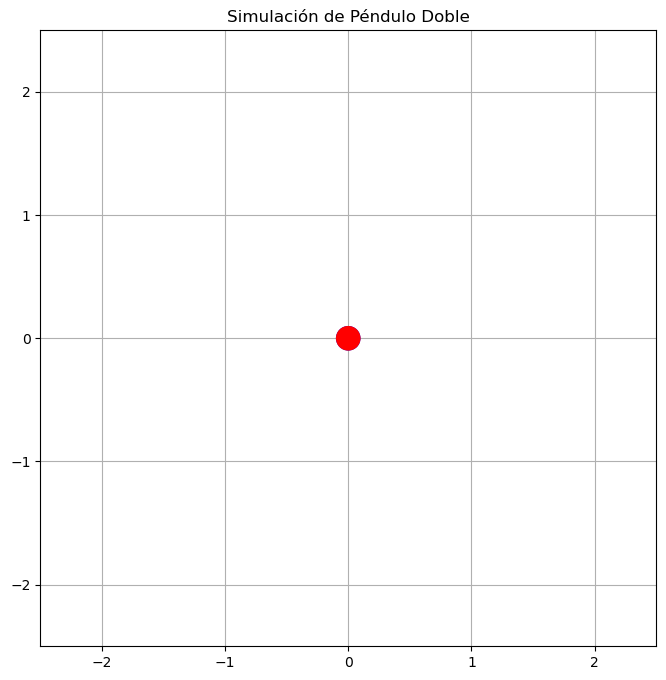

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Circle, Rectangle
import os
E=10.0

# Función para leer el archivo de coordenadas
def leer_coordenadas(nombre_archivo):
    frames = []
    
    try:
        with open(nombre_archivo, 'r') as archivo:
            contenido = archivo.read()
            bloques = contenido.split('\n\n')
            
            for bloque in bloques:
                if bloque.strip():  # Ignorar bloques vacíos
                    lineas = bloque.strip().split('\n')
                    frame = []
                    
                    for linea in lineas:
                        if linea.strip():  # Ignorar líneas vacías
                            try:
                                x, y = map(float, linea.split(','))
                                frame.append((x, y))
                            except ValueError:
                                print(f"Error al parsear la línea: {linea}")
                    
                    if len(frame) == 2:  # Asegurarse de que hay exactamente 2 puntos
                        frames.append(frame)
        
        return frames
    except FileNotFoundError:
        print(f"El archivo {nombre_archivo} no se encontró.")
        return []
    except Exception as e:
        print(f"Error al leer el archivo: {e}")
        return []

# Función para crear la animación
def animar_pendulo_doble(frames):
    # Configuración de la figura
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_title('Simulación de Péndulo Doble')
    
    # Inicializar elementos gráficos
    origen = (0, 0)
    radio_circulo = 0.1
    
    # Crear círculos
    circulo1 = Circle((0, 0), radio_circulo, fc='blue', zorder=10)
    circulo2 = Circle((0, 0), radio_circulo, fc='red', zorder=10)
    
    ax.add_patch(circulo1)
    ax.add_patch(circulo2)
    
    # Crear líneas
    linea1, = ax.plot([], [], 'k-', lw=2)
    linea2, = ax.plot([], [], 'k-', lw=2)
    
    # Función de inicialización para la animación
    def init():
        circulo1.center = (0, 0)
        circulo2.center = (0, 0)
        linea1.set_data([], [])
        linea2.set_data([], [])
        return circulo1, circulo2, linea1, linea2
    
    # Función de actualización para la animación
    def update(frame_num):
        if frame_num < len(frames):
            frame = frames[frame_num]
            
            # Actualizar posición de los círculos
            pos1 = frame[0]
            pos2 = frame[1]
            
            circulo1.center = pos1
            circulo2.center = pos2
            
            # Actualizar posición de las líneas
            linea1.set_data([origen[0], pos1[0]], [origen[1], pos1[1]])
            linea2.set_data([pos1[0], pos2[0]], [pos1[1], pos2[1]])
            
        return circulo1, circulo2, linea1, linea2
    
    # Crear la animación
    ani = animation.FuncAnimation(fig, update, frames=len(frames),
                                  init_func=init, blit=True, interval=10)

    return fig, ani

# Función principal

# Solicitar el nombre del archivo
nombre_archivo = f"C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/posicionesTXT/posiciones_E{E}.txt"
    
# Leer las coordenadas
frames = leer_coordenadas(nombre_archivo)
    

    
print(f"Se cargaron {len(frames)} frames de animación.")
    
# Crear la animación
fig, ani = animar_pendulo_doble(frames)
    
    # Guardar la animación como archivo GIF o mostrarla


    #ani.save(f"C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/animacion.mp4", writer='pillow', fps=20)
    #print(f"Animación guardada como {nombre_salida}.gif")

plt.show()


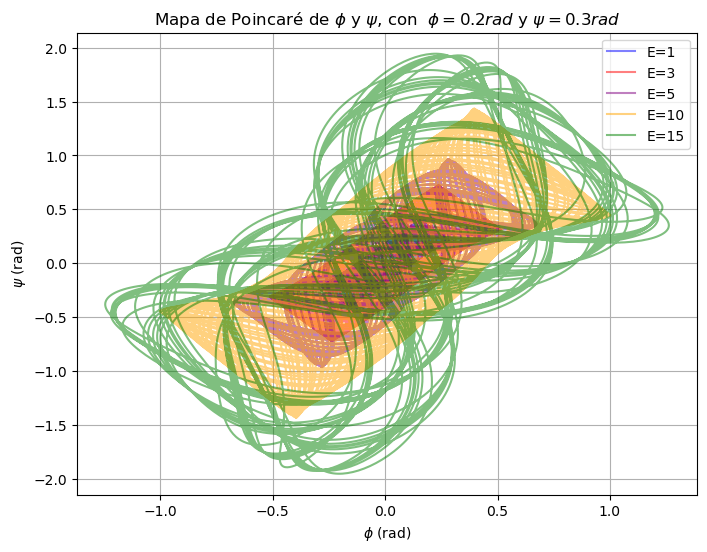

In [25]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress,pearsonr
from scipy.optimize import curve_fit



def convert_float(value):
    # Convert bytes to string if necessary
    if isinstance(value, bytes):
        value = value.decode('utf-8')
    return float(value.replace(',', '.'))

def load_data_from_file(filename):
    # Define converters for each column to handle commas as decimal separators
    converters = {0: convert_float, 1: convert_float}#, 2: convert_float, 3: convert_float}
    
    # Load the data from the file using the converters and specifying the tab delimiter
    data = np.loadtxt(filename, delimiter=',', converters=converters)
    
    # Extract each column from the data
    x = data[:, 0]
    y = data[:, 1]
    #errx = data[:, 2]
    #erry = data[:, 3]
    
    return x, y#, errx, erry

# Cambiar nombre del archivo de datos para cambiar los datos recogidos
x, y = load_data_from_file("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/poincareTXT/poincare_phi_psi_E1.0.txt")
x1, y1 = load_data_from_file("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/poincareTXT/poincare_phi_psi_E3.0.txt")
x2, y2 = load_data_from_file("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/poincareTXT/poincare_phi_psi_E5.0.txt")
x3, y3 = load_data_from_file("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/poincareTXT/poincare_phi_psi_E10.0.txt")
x4, y4 = load_data_from_file("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/poincareTXT/poincare_phi_psi_E15.0.txt")
#x5, y5 = load_data_from_file("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/poincareTXT/poincare_phi_psi_E20.0.txt")

#def line_fit(x, slope, intercept):
  #  return slope * x + intercept

#Valores de x para la línea ajustada
line_x = np.array([min(x), max(x)])
line_x1 = np.array([min(x1), max(x1)])
line_x2 = np.array([min(x2), max(x2)])
line_x3 = np.array([min(x3), max(x3)])
line_x4 = np.array([min(x4), max(x4)])
#line_x5 = np.array([min(x5), max(x5)])
# Valores de y usando la función de ajuste
line_y = np.array([min(y), max(y)])
line_y1 = np.array([min(y1), max(y1)])
line_y2 = np.array([min(y2), max(y2)])
line_y3 = np.array([min(y3), max(y3)])
line_y4 = np.array([min(y4), max(y4)])
#line_y5 = np.array([min(y5), max(y5)])



plt.figure(figsize=(8, 6))



plt.plot(x, y, color='blue', label='E=1', alpha=0.5)  # Dibuja los puntos de datos con transparencia
plt.plot(x1, y1, color='red', label='E=3', alpha=0.5)  # Dibuja los puntos de datos con transparencia
plt.plot(x2, y2, color='purple', label='E=5', alpha=0.5)  # Dibuja los puntos de datos con transparencia
plt.plot(x3, y3, color='orange', label='E=10', alpha=0.5)  # Dibuja los puntos de datos con transparencia
plt.plot(x4, y4, color='green', label='E=15', alpha=0.5)  # Dibuja los puntos de datos con transparencia
#plt.plot(x5, y5, color='yellow', label='E=20', alpha=0.5)  # Dibuja los puntos de datos con transparencia



plt.xlabel(r'$\phi$ (rad)')
plt.ylabel(r'$\psi$ (rad)')
plt.title(r'Mapa de Poincaré de $\phi$ y $\psi$, con  $\phi=0.2rad$ y $\psi=0.3rad$')




plt.legend()
plt.grid(True)  #Poner cuadrilla
plt.savefig("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/plots/poincarephipsi")  #Guardar plot en ruta
plt.show()

#se_intercept = std_err * np.sqrt(np.sum(x**2) / len(x))
#print(f"La ecuación de la línea es y = ({slope:.9f} ± {std_err:.9f})x + ({intercept:.9f} ± {se_intercept:.9f})")

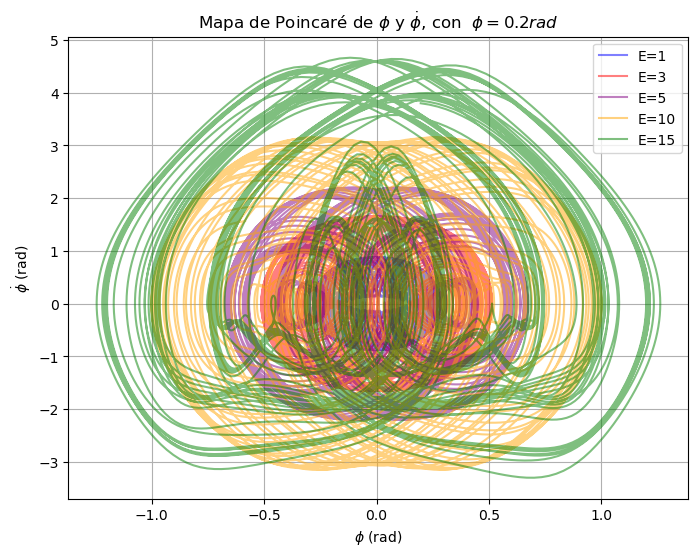

In [24]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress,pearsonr
from scipy.optimize import curve_fit



def convert_float(value):
    # Convert bytes to string if necessary
    if isinstance(value, bytes):
        value = value.decode('utf-8')
    return float(value.replace(',', '.'))

def load_data_from_file(filename):
    # Define converters for each column to handle commas as decimal separators
    converters = {0: convert_float, 1: convert_float}#, 2: convert_float, 3: convert_float}
    
    # Load the data from the file using the converters and specifying the tab delimiter
    data = np.loadtxt(filename, delimiter=',', converters=converters)
    
    # Extract each column from the data
    x = data[:, 0]
    y = data[:, 1]
    #errx = data[:, 2]
    #erry = data[:, 3]
    
    return x, y#, errx, erry

# Cambiar nombre del archivo de datos para cambiar los datos recogidos
x, y = load_data_from_file("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/poincareTXT/poincare_phi_dphi_E1.0.txt")
x1, y1 = load_data_from_file("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/poincareTXT/poincare_phi_dphi_E3.0.txt")
x2, y2 = load_data_from_file("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/poincareTXT/poincare_phi_dphi_E5.0.txt")
x3, y3 = load_data_from_file("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/poincareTXT/poincare_phi_dphi_E10.0.txt")
x4, y4 = load_data_from_file("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/poincareTXT/poincare_phi_dphi_E15.0.txt")
#x5, y5 = load_data_from_file("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/poincareTXT/poincare_phi_dphi_E20.0.txt")

#def line_fit(x, slope, intercept):
  #  return slope * x + intercept

#Valores de x para la línea ajustada
line_x = np.array([min(x), max(x)])
line_x1 = np.array([min(x1), max(x1)])
line_x2 = np.array([min(x2), max(x2)])
line_x3 = np.array([min(x3), max(x3)])
line_x4 = np.array([min(x4), max(x4)])
#line_x5 = np.array([min(x5), max(x5)])
# Valores de y usando la función de ajuste
line_y = np.array([min(y), max(y)])
line_y1 = np.array([min(y1), max(y1)])
line_y2 = np.array([min(y2), max(y2)])
line_y3 = np.array([min(y3), max(y3)])
line_y4 = np.array([min(y4), max(y4)])
#line_y5 = np.array([min(y5), max(y5)])




plt.figure(figsize=(8, 6))



plt.plot(x, y, color='blue', label='E=1', alpha=0.5)  # Dibuja los puntos de datos con transparencia
plt.plot(x1, y1, color='red', label='E=3', alpha=0.5)  # Dibuja los puntos de datos con transparencia
plt.plot(x2, y2, color='purple', label='E=5', alpha=0.5)  # Dibuja los puntos de datos con transparencia
plt.plot(x3, y3, color='orange', label='E=10', alpha=0.5)  # Dibuja los puntos de datos con transparencia
plt.plot(x4, y4, color='green', label='E=15', alpha=0.5)  # Dibuja los puntos de datos con transparencia
#plt.plot(x5, y5, color='yellow', label='E=20', alpha=0.5)  # Dibuja los puntos de datos con transparencia



plt.xlabel(r'$\phi$ (rad)')
plt.ylabel(r'$\dot{\phi}$ (rad)')
plt.title(r'Mapa de Poincaré de $\phi$ y $\dot{\phi}$, con  $\phi=0.2rad$')




plt.legend()
plt.grid(True)  #Poner cuadrilla
plt.savefig("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/plots/poincarephidphi")  #Guardar plot en ruta
plt.show()

#se_intercept = std_err * np.sqrt(np.sum(x**2) / len(x))
#print(f"La ecuación de la línea es y = ({slope:.9f} ± {std_err:.9f})x + ({intercept:.9f} ± {se_intercept:.9f})")

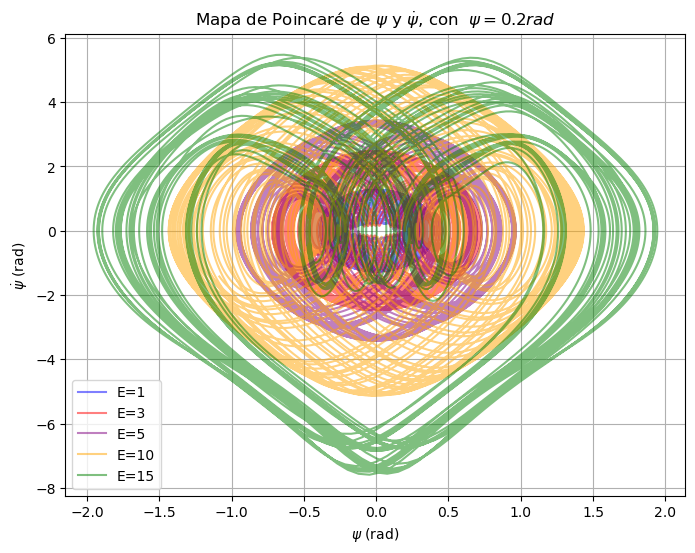

In [9]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress,pearsonr
from scipy.optimize import curve_fit



def convert_float(value):
    # Convert bytes to string if necessary
    if isinstance(value, bytes):
        value = value.decode('utf-8')
    return float(value.replace(',', '.'))

def load_data_from_file(filename):
    # Define converters for each column to handle commas as decimal separators
    converters = {0: convert_float, 1: convert_float}#, 2: convert_float, 3: convert_float}
    
    # Load the data from the file using the converters and specifying the tab delimiter
    data = np.loadtxt(filename, delimiter=',', converters=converters)
    
    # Extract each column from the data
    x = data[:, 0]
    y = data[:, 1]
    #errx = data[:, 2]
    #erry = data[:, 3]
    
    return x, y#, errx, erry

# Cambiar nombre del archivo de datos para cambiar los datos recogidos
x, y = load_data_from_file("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/poincareTXT/poincare_psi_dpsi_E1.0.txt")
x1, y1 = load_data_from_file("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/poincareTXT/poincare_psi_dpsi_E3.0.txt")
x2, y2 = load_data_from_file("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/poincareTXT/poincare_psi_dpsi_E5.0.txt")
x3, y3 = load_data_from_file("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/poincareTXT/poincare_psi_dpsi_E10.0.txt")
x4, y4 = load_data_from_file("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/poincareTXT/poincare_psi_dpsi_E15.0.txt")
#x5, y5 = load_data_from_file("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/poincareTXT/poincare_psi_dpsi_E20.0.txt")

#def line_fit(x, slope, intercept):
  #  return slope * x + intercept

#Valores de x para la línea ajustada
line_x = np.array([min(x), max(x)])
line_x1 = np.array([min(x1), max(x1)])
line_x2 = np.array([min(x2), max(x2)])
line_x3 = np.array([min(x3), max(x3)])
line_x4 = np.array([min(x4), max(x4)])
#line_x5 = np.array([min(x5), max(x5)])
# Valores de y usando la función de ajuste
line_y = np.array([min(y), max(y)])
line_y1 = np.array([min(y1), max(y1)])
line_y2 = np.array([min(y2), max(y2)])
line_y3 = np.array([min(y3), max(y3)])
line_y4 = np.array([min(y4), max(y4)])
#line_y5 = np.array([min(y5), max(y5)])





plt.figure(figsize=(8, 6))



plt.plot(x, y, color='blue', label='E=1', alpha=0.5)  # Dibuja los puntos de datos con transparencia
plt.plot(x1, y1, color='red', label='E=3', alpha=0.5)  # Dibuja los puntos de datos con transparencia
plt.plot(x2, y2, color='purple', label='E=5', alpha=0.5)  # Dibuja los puntos de datos con transparencia
plt.plot(x3, y3, color='orange', label='E=10', alpha=0.5)  # Dibuja los puntos de datos con transparencia
plt.plot(x4, y4, color='green', label='E=15', alpha=0.5)  # Dibuja los puntos de datos con transparencia
#plt.plot(x5, y5, color='yellow', label='E=20', alpha=0.5)  # Dibuja los puntos de datos con transparencia



plt.xlabel(r'$\psi$ (rad)')
plt.ylabel(r'$\dot{\psi}$ (rad)')
plt.title(r'Mapa de Poincaré de $\psi$ y $\dot{\psi}$, con  $\psi=0.2rad$')




plt.legend()
plt.grid(True)  #Poner cuadrilla
plt.savefig("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/plots/poincarepsidpsi")  #Guardar plot en ruta
plt.show()

#se_intercept = std_err * np.sqrt(np.sum(x**2) / len(x))
#print(f"La ecuación de la línea es y = ({slope:.9f} ± {std_err:.9f})x + ({intercept:.9f} ± {se_intercept:.9f})")

C:\Users\Teresa\AppData\Local\Temp\ipykernel_26832\1256834701.py:30: OptimizeWarning: Covariance of the parameters could not be estimated
  params1, cov = curve_fit(exponencial, t, delta1)
C:\Users\Teresa\AppData\Local\Temp\ipykernel_26832\1256834701.py:32: OptimizeWarning: Covariance of the parameters could not be estimated
  params3, cov = curve_fit(exponencial, t, delta3)
C:\Users\Teresa\AppData\Local\Temp\ipykernel_26832\1256834701.py:34: OptimizeWarning: Covariance of the parameters could not be estimated
  params5, cov = curve_fit(exponencial, t, delta5)
C:\Users\Teresa\AppData\Local\Temp\ipykernel_26832\1256834701.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  params10, cov = curve_fit(exponencial, t, delta10)
C:\Users\Teresa\AppData\Local\Temp\ipykernel_26832\1256834701.py:38: OptimizeWarning: Covariance of the parameters could not be estimated
  params15, cov = curve_fit(exponencial, t, delta15)


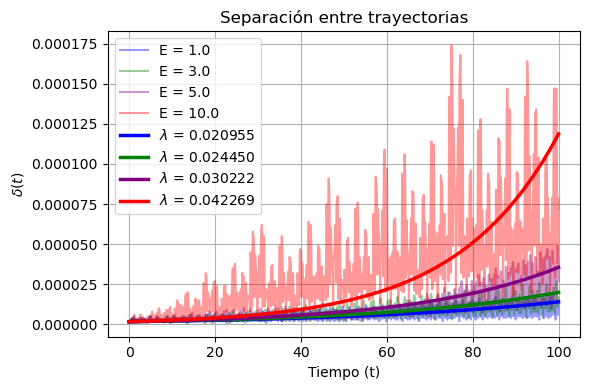

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# === CONFIGURACIÓN ===
archivo1 = "c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/perturbaciones/distancia_1.txt"  # cambia esto si el archivo tiene otro nombre
archivo3 = "c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/perturbaciones/distancia_3.txt"  # cambia esto si el archivo tiene otro nombre
archivo5 = "c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/perturbaciones/distancia_5.txt"  # cambia esto si el archivo tiene otro nombre
archivo10 = "c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/perturbaciones/distancia_10.txt"  # cambia esto si el archivo tiene otro nombre
archivo15 = "c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/perturbaciones/distancia_15.txt"  # cambia esto si el archivo tiene otro nombre


dt = 0.01               # paso de integración usado en la simulación

# === LECTURA DEL ARCHIVO ===
delta1 = np.loadtxt(archivo1)          # lee los deltas: un delta por línea
delta3 = np.loadtxt(archivo3)
delta5 = np.loadtxt(archivo5)
delta10 = np.loadtxt(archivo10)
delta15 = np.loadtxt(archivo15)

t = np.arange(len(delta1)) * dt       # crea el vector de tiempos



def exponencial(x, a, b):
    return 0.000001*np.sqrt(3)*np.exp(a*x)

params1, cov = curve_fit(exponencial, t, delta1)
a1, b1 = params1
params3, cov = curve_fit(exponencial, t, delta3)
a3, b3 = params3
params5, cov = curve_fit(exponencial, t, delta5)
a5, b5 = params5
params10, cov = curve_fit(exponencial, t, delta10)
a10, b10 = params10
params15, cov = curve_fit(exponencial, t, delta15)
a15, b15 = params15




x1_fit = np.array([min(t), max(t)])
x3_fit = np.array([min(t), max(t)])
x5_fit = np.array([min(t), max(t)])
x10_fit = np.array([min(t), max(t)])
x15_fit = np.array([min(t), max(t)])

y1_fit = exponencial(t, a1, b1)
y3_fit = exponencial(t, a3, b3)
y5_fit = exponencial(t, a5, b5)
y10_fit = exponencial(t, a10, b10)
y15_fit = exponencial(t, a15, b15)



# === GRÁFICO 1: delta(t) ===
plt.figure(figsize=(6, 4))
transparencia = 0.4

plt.plot(t, delta1, label='E = 1.0', color='blue',alpha=transparencia)
plt.plot(t, delta3, label='E = 3.0', color='green',alpha=transparencia)
plt.plot(t, delta5, label='E = 5.0', color='purple',alpha=transparencia)
plt.plot(t, delta10, label='E = 10.0', color='red',alpha=transparencia)
#plt.plot(t, delta15, label='E = 15.0', color='yellow')




# AÑADIMOS LOS AJUSTES EXPONENCIALES
plt.plot(t, y1_fit, color='blue', linestyle='-', linewidth=2.5, label= r'$\lambda$ = %f' % a1)
plt.plot(t, y3_fit, color='green', linestyle='-', linewidth=2.5, label= r'$\lambda$ = %f' % a3)
plt.plot(t, y5_fit, color='purple', linestyle='-', linewidth=2.5, label= r'$\lambda$ = %f' % a5)
plt.plot(t, y10_fit, color='red', linestyle='-', linewidth=2.5, label= r'$\lambda$ = %f' % a10)
#plt.plot(x15_fit, y15_fit, color='yellow', linestyle='-', linewidth=2.5, label= r'$\lambda$ = %f' % a15)

plt.xlabel(r'Tiempo (t)')
plt.ylabel(r'$\delta(t)$')
plt.title('Separación entre trayectorias')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/plots/delta_t.png")
plt.show()



C:\Users\Teresa\AppData\Local\Temp\ipykernel_26832\4083612170.py:15: UserWarning: loadtxt: input contained no data: "c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/perturbaciones/lambda_1.txt"
  delta1 = np.loadtxt(archivo1)          # lee los deltas: un delta por línea
C:\Users\Teresa\AppData\Local\Temp\ipykernel_26832\4083612170.py:16: UserWarning: loadtxt: input contained no data: "c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/perturbaciones/lambda_3.txt"
  delta3 = np.loadtxt(archivo3)
C:\Users\Teresa\AppData\Local\Temp\ipykernel_26832\4083612170.py:17: UserWarning: loadtxt: input contained no data: "c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/perturbaciones/lambda_5.txt"
  delta5 = np.loadtxt(archivo5)
C:\Users\Teresa\AppData\Local\Temp\ipykernel_26832\4083612170.py:18: UserWarning: loadtxt: input contained no data: "c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/per

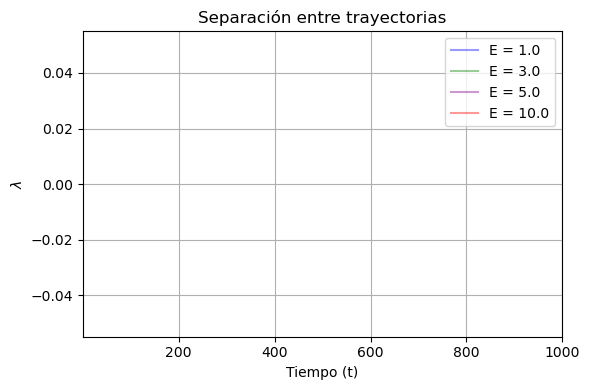

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# === CONFIGURACIÓN ===
archivo1 = "c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/perturbaciones/lambda_1.txt"  # cambia esto si el archivo tiene otro nombre
archivo3 = "c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/perturbaciones/lambda_3.txt"  # cambia esto si el archivo tiene otro nombre
archivo5 = "c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/perturbaciones/lambda_5.txt"  # cambia esto si el archivo tiene otro nombre
archivo10 = "c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/perturbaciones/lambda_10.txt"  # cambia esto si el archivo tiene otro nombre
archivo15 = "c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/perturbaciones/lambda_15.txt"  # cambia esto si el archivo tiene otro nombre


dt = 0.01               # paso de integración usado en la simulación

# === LECTURA DEL ARCHIVO ===
delta1 = np.loadtxt(archivo1)          # lee los deltas: un delta por línea
delta3 = np.loadtxt(archivo3)
delta5 = np.loadtxt(archivo5)
delta10 = np.loadtxt(archivo10)
delta15 = np.loadtxt(archivo15)

t = np.arange(len(delta1)) * dt *200      # crea el vector de tiempos





# === GRÁFICO 1: delta(t) ===
plt.figure(figsize=(6, 4))
transparencia = 0.4

plt.plot(t, delta1, label='E = 1.0', color='blue',alpha=transparencia)
plt.plot(t, delta3, label='E = 3.0', color='green',alpha=transparencia)
plt.plot(t, delta5, label='E = 5.0', color='purple',alpha=transparencia)
plt.plot(t, delta10, label='E = 10.0', color='red',alpha=transparencia)
#plt.plot(t, delta15, label='E = 15.0', color='yellow')




plt.xticks([200, 400, 600, 800, 1000])
plt.xlabel(r'Tiempo (t)')
plt.ylabel(r'$\lambda$')
plt.title('Separación entre trayectorias')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.savefig("C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_PenduloDoble/plots/delta_t_2.png")
plt.show()

